In [3]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import sys
sys.path.insert(0,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr\\Lib\\site-packages")
sys.path.insert(1,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr")

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir)


import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

dl = DataLib("SignalData")

## 1. Bond yields across countries

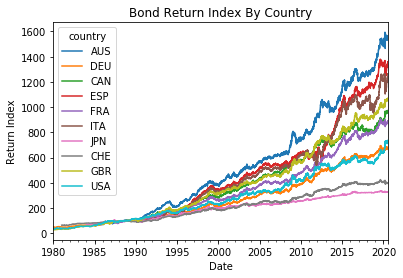

In [4]:
BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index By Country')
plt.show()

## 2. Rolling 3 year returns across countries

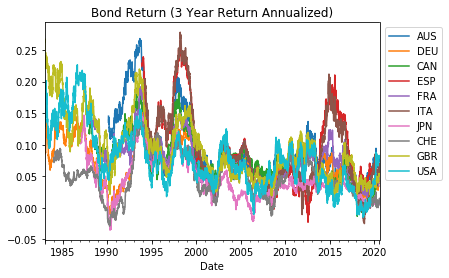

In [5]:
WEEKDAYS_IN_YEAR = 261

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex3Year_Unannualized = BondReturnIndex.pct_change(WEEKDAYS_IN_YEAR * 3, fill_method = None).dropna(how='all') # 

BondReturnIndex3Year = (BondReturnIndex3Year_Unannualized + 1) ** (1/3) - 1

BondReturnIndex3Year.plot()

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Date")
plt.title('Bond Return (3 Year Return Annualized)')
plt.show()

Australian returns were higher in the 1990s than in other countries, liekly caused by a recession in 1991.  Japan had low bond returns in the early 2000s, likely caused by deflation and effectively zero bond returns. 

## 3. Hedging against currency

country  AUS        DEU  CAN  ESP  FRA  ITA  JPN  CHE        GBR        USA
date                                                                       
1980-01  NaN  48.763696  NaN  NaN  NaN  NaN  NaN  NaN  27.032087  36.701913
1980-02  NaN  48.001143  NaN  NaN  NaN  NaN  NaN  NaN  27.331286  33.847190
1980-03  NaN  45.299381  NaN  NaN  NaN  NaN  NaN  NaN  27.581762  33.503333
1980-04  NaN  45.674091  NaN  NaN  NaN  NaN  NaN  NaN  28.927318  36.153455
1980-05  NaN  48.413864  NaN  NaN  NaN  NaN  NaN  NaN  30.051182  39.395318
country     AUS     DEU     CAN      ESP     FRA      ITA       JPN     CHE  \
date                                                                          
1980-01  0.9006  1.7239  1.1639  66.1089  4.0384  804.617  237.7609  1.5929   
1980-02  0.9052  1.7473  1.1560  66.6349  4.0948  809.565  244.1371  1.6363   
1980-03  0.9166  1.8497  1.1731  69.2147  4.3112  859.385  248.3914  1.7584   
1980-04  0.9143  1.8694  1.1856  71.6580  4.3353  872.760  249.3265  1.75

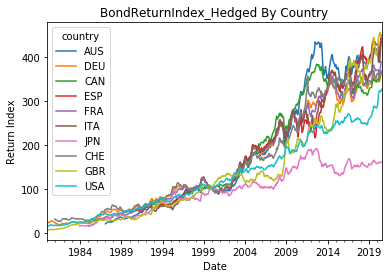

In [91]:
BondReturnIndex_Unhedged = BondReturnIndex.resample('1M').mean()
print(BondReturnIndex_Unhedged.head())

fxVsUSD = dl.pull('fxVsUSD')
print(fxVsUSD.head())

BondReturnIndex_Hedged = BondReturnIndex_Unhedged/fxVsUSD

# Resolving USD Exchange rates -- should be identical yo BondReturnIndex_Monthly
BondReturnIndex_Hedged['USA'] = BondReturnIndex_Unhedged['USA']

# Rescale hedge so that it is 100 on 2000-01
for country in BondReturnIndex_Hedged:
    BondReturnIndex_Hedged[country] = BondReturnIndex_Hedged[country] * 100 / BondReturnIndex_Hedged[country]['2000-01']

# Plot hedged returns
BondReturnIndex_Hedged.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('BondReturnIndex_Hedged By Country')
plt.show()

country  AUS       DEU  CAN  ESP  FRA  ITA  JPN  CHE       GBR       USA
date                                                                    
1980-02  NaN -0.172325  NaN  NaN  NaN  NaN  NaN  NaN  0.141211 -0.621551
1980-03  NaN -0.501014  NaN  NaN  NaN  NaN  NaN  NaN  0.115689 -0.115323
1980-04  NaN  0.103905  NaN  NaN  NaN  NaN  NaN  NaN  0.771063  1.493110
1980-05  NaN  1.011861  NaN  NaN  NaN  NaN  NaN  NaN  0.579940  1.802449
1980-06  NaN  0.640505  NaN  NaN  NaN  NaN  NaN  NaN -0.067468  0.442054


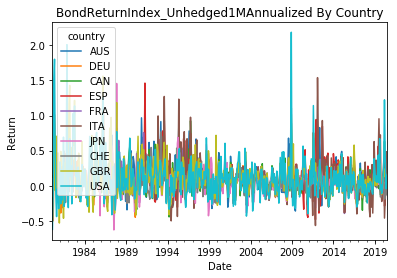

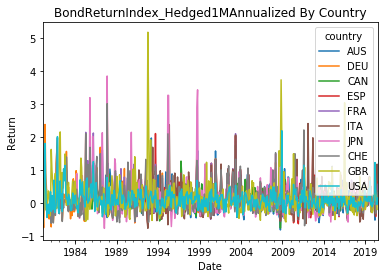

In [7]:
# Annualize Returns

MONTHS_ANNUALIZED = 1

# Find annualized returns for Unhedged
BondReturnIndex_Unhedged1MUnannualized = BondReturnIndex_Unhedged.pct_change(MONTHS_ANNUALIZED, fill_method = None).dropna(how='all') # 
BondReturnIndex_Unhedged1MAnnualized = (BondReturnIndex_Unhedged1MUnannualized + 1) ** (12/MONTHS_ANNUALIZED) - 1
print(BondReturnIndex_Unhedged1MAnnualized.head())

BondReturnIndex_Unhedged1MAnnualized.plot()
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('BondReturnIndex_Unhedged1MAnnualized By Country')
plt.show()


# Find annualized returns for Hedged
BondReturnIndex_Hedged1MUnannualized = BondReturnIndex_Hedged.pct_change(MONTHS_ANNUALIZED, fill_method = None).dropna(how='all') # 
BondReturnIndex_Hedged1MAnnualized = (BondReturnIndex_Hedged1MUnannualized + 1) ** (12/MONTHS_ANNUALIZED) - 1

BondReturnIndex_Hedged1MAnnualized.plot()
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('BondReturnIndex_Hedged1MAnnualized By Country')
plt.show()


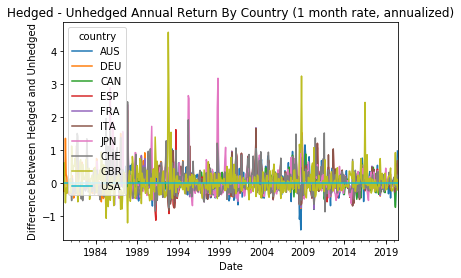

In [8]:
# Difference in returns
BondReturnHedgedMinusUnhedged = BondReturnIndex_Hedged1MAnnualized - BondReturnIndex_Unhedged1MAnnualized - 0.002

BondReturnHedgedMinusUnhedged.plot()
plt.xlabel('Date')
plt.ylabel('Difference between Hedged and Unhedged')
plt.title('Hedged - Unhedged Annual Return By Country (' + str(MONTHS_ANNUALIZED) + ' month rate, annualized)')
plt.show()

Returns for hedged GBR bonds rose sharply in 1992 -- this is likely caused by Black Wednesday and the massive currency devaluation, which raised hedged returns while unhedged returns fell sharply. 

## 4. Returns to Diversified Bonds vs. US 60/40

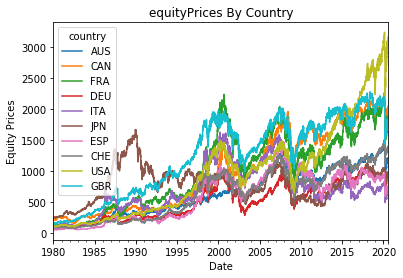

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
1980-01,9.97,NaN,NaN,NaN,NaN,NaN,7.295,NaN,NaN,11.23
1980-02,10.38,8.426,NaN,NaN,NaN,NaN,7.295,NaN,NaN,12.04
1980-03,10.75,9.123,NaN,NaN,NaN,NaN,7.295,NaN,NaN,14.83
1980-04,11.20,10.085,NaN,NaN,NaN,NaN,7.960,NaN,NaN,14.59
1980-05,11.40,9.416,NaN,NaN,NaN,NaN,7.960,NaN,NaN,10.70


In [9]:
equityPrices = dl.pull('equityPrices')
equityPrices.plot()
plt.xlabel('Date')
plt.ylabel('Equity Prices')
plt.title('equityPrices By Country')
plt.show()

      equities  equities_Price     bonds  bonds_Price
date                                                 
1981  0.230718      123.071765  0.030521   103.052097
1982 -0.092990      111.627372  0.032955   106.448195
1983  0.132570      126.425759  0.368271   145.649992
1984  0.185387      149.863484  0.045644   152.298105
1985  0.010062      151.371392  0.144798   174.350585


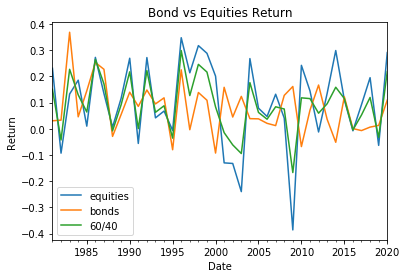

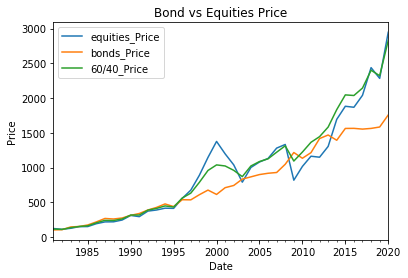

In [39]:
# Artificially create 60/40 (equities/bonds) portfolio
# Assume that
#     Bonds held are the 10-year bond
#     Portfolio is rebalanced at the end of every calendar year

USEquities = equityPrices[['USA']].copy()
US10YBonds = BondReturnIndex_Unhedged[['USA']].copy()

options = ['equities', 'bonds']
data_dict = {'equities': USEquities, 'bonds': US10YBonds}

returns = pd.DataFrame()

for investment in options:
    data = data_dict[investment]
    data = data.resample('1Y').first()
        
    annualized_return = data.pct_change(1, fill_method = None).dropna(how='all')

    annualized_return.columns = ['return']
    
    returns[investment] = annualized_return['return']
        
    start = 100
    annualized_return['price'] = start * (1 + annualized_return['return']).cumprod()
    
    price_col = investment + '_Price'
    
    returns[price_col] = annualized_return['price']
    
print(returns.head())

# make 60/40 as combination of 1-year returns from equities and bonds

returns['60/40'] = .6 * returns['equities'] + .4 * returns['bonds']
start = 100
returns['60/40_Price'] = start * (1 + returns['60/40']).cumprod()    

returns.plot(y = ["equities", "bonds", '60/40'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Bond vs Equities Return')
plt.show()

returns.plot(y = ["equities_Price", "bonds_Price", '60/40_Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bond vs Equities Price')
plt.show()


In [60]:
# calculate average return and volatility

returns_6040 = list(returns['60/40'])

import statistics

# Calculate mean_return, volatility, risk-free rates
mean_return = round(statistics.mean(returns_6040),4)
volatility = round(statistics.stdev(returns_6040),4)

print('Mean return: ' + str(mean_return))
print('Volatility: ' + str(volatility))

shortRates = dl.pull('shortRates')['USA']
shortRates = shortRates.resample('1Y').first()

returns['shortRates'] = shortRates / 100
riskfree = round(statistics.mean(returns['shortRates']),4)
print('Risk Free:' + str(riskfree))

# Calculate Sharpe Ratios with the overall volatility across all time
returns['Sharpe'] = (returns['equities'] - returns['shortRates']) / volatility

Sharpe = round(statistics.mean(returns['Sharpe']),4)
print('Sharpe: ' + str(Sharpe))


Mean return: 0.0922
Volatility: 0.1047
Risk Free:0.0478
Sharpe: 0.5115


country  AUS       DEU       CAN  ESP  FRA  ITA       JPN       CHE       GBR  \
date                                                                            
1981     NaN  0.006529       NaN  NaN  NaN  NaN       NaN  0.000094  0.192059   
1982     NaN  0.051991       NaN  NaN  NaN  NaN       NaN  0.057724  0.099121   
1983     NaN  0.216376       NaN  NaN  NaN  NaN       NaN  0.156118  0.535106   
1984     NaN  0.018513       NaN  NaN  NaN  NaN  0.000206  0.028589  0.078297   
1985     NaN  0.160680  0.000321  NaN  NaN  NaN  0.129993  0.019930  0.037549   

country       USA  Equal Weighted Mean  Diversified_Price  
date                                                       
1981     0.009993             0.052169         105.216865  
1982     0.046224             0.063765         111.926038  
1983     0.354567             0.315542         147.243389  
1984     0.028484             0.030818         151.781107  
1985     0.141717             0.081698         164.181373  


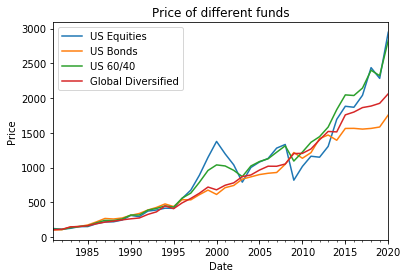

In [74]:
# Creation of global bonds portfolio
# Choose to weight equally

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex_Annual = BondReturnIndex.resample('1Y').first()
BondReturn_Annual = BondReturnIndex_Annual.pct_change(1, fill_method = None).dropna(how='all')
BondReturn_Annual['Equal Weighted Mean'] = BondReturn_Annual.mean(axis=1)
start = 100
BondReturn_Annual['Diversified_Price'] = start * (1 + BondReturn_Annual['Equal Weighted Mean']).cumprod()
print(BondReturn_Annual.head())

returns.plot(y = ["equities_Pr", "bonds_Price", '60/40_Price'])
BondReturn_Annual['Diversified_Price'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['US Equities', 'US Bonds', 'US 60/40', 'Global Diversified'])
plt.title('Price of different funds')
plt.show()

## 5. Australia M1/M2/M3

## 6. Current acount linkages

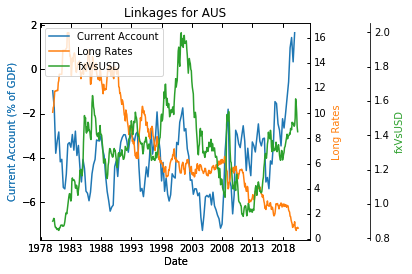

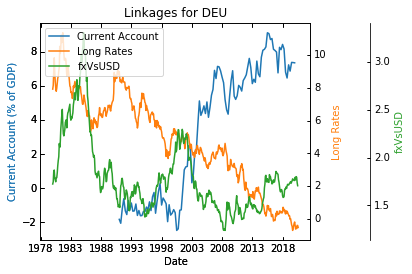

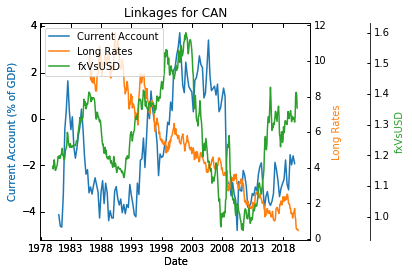

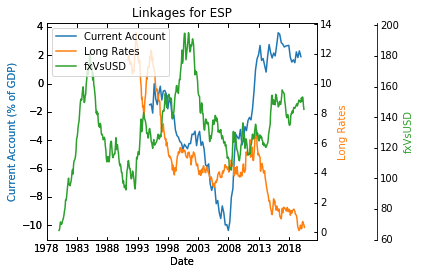

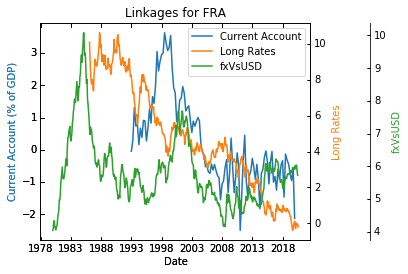

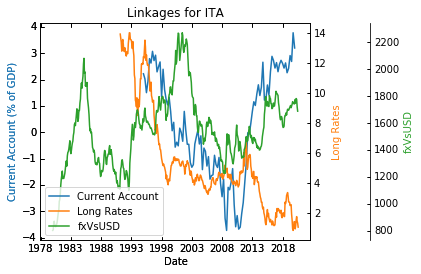

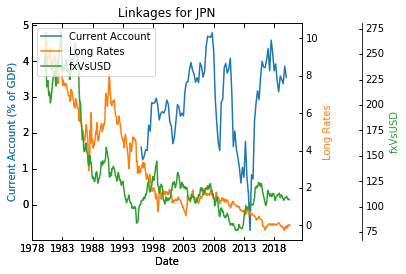

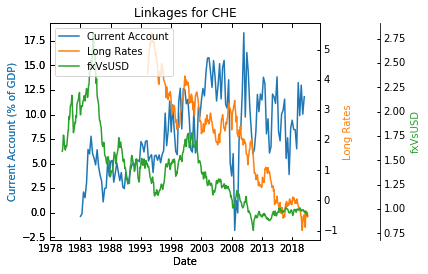

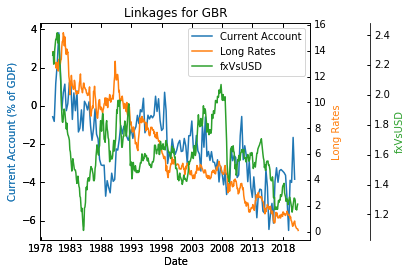

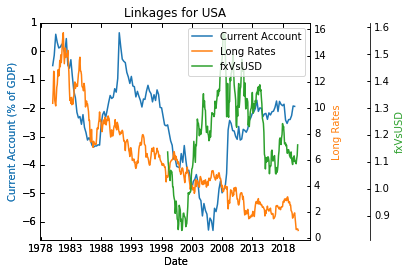

In [86]:
LongRates = dl.pull('LongRates')
CurrAcctPctGDP = dl.pull('CurrAcctPctGDP')
fxVsUSD = dl.pull('fxVsUSD')

all_countries = LongRates.columns

# using code from https://matplotlib.org/examples/axes_grid/demo_parasite_axes2.html

for country in all_countries:
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))

    par2.axis["right"].toggle(all=True)
    
    host.set_xlabel("Date")
    host.set_ylabel("Current Account (% of GDP)")
    par1.set_ylabel("Long Rates")
    par2.set_ylabel("fxVsUSD")

    p1, = host.plot(CurrAcctPctGDP[country].to_timestamp(), label = "Current Account")
    p2, = par1.plot(LongRates[country].to_timestamp(), label = "Long Rates")
    p3, = par2.plot(fxVsUSD[country].to_timestamp(), label = "fxVsUSD")
    
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    
    host.legend()
    
    plt.title('Linkages for ' + country)

    plt.draw()
    plt.show()


# 7. Opportunity Cost, Inflation drive bond returns

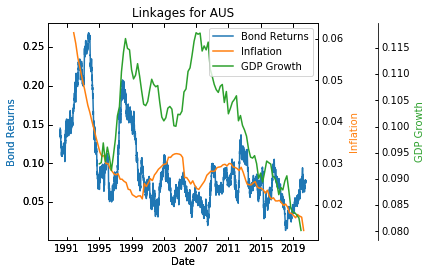

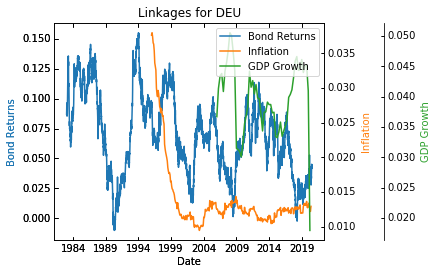

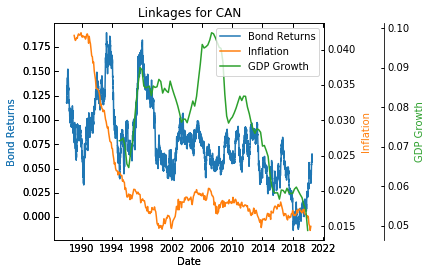

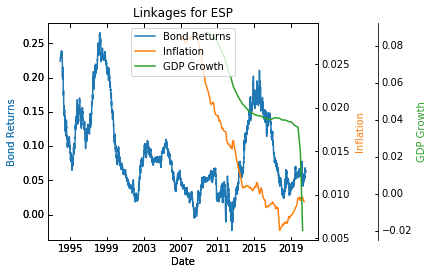

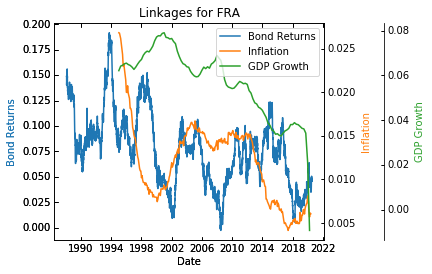

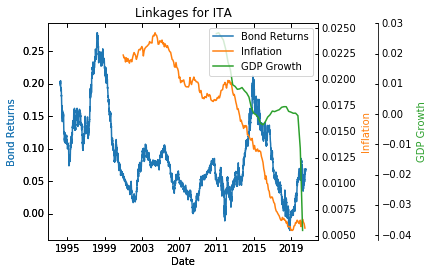

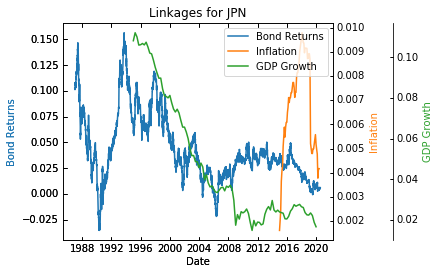

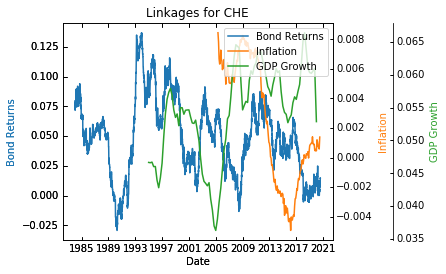

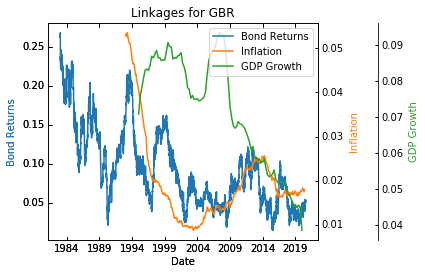

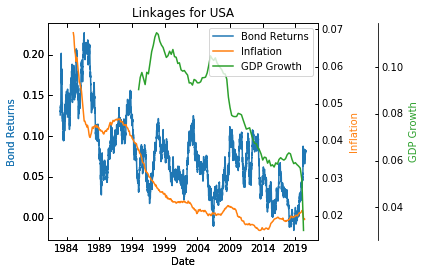

In [95]:
# Generate average inflation over past 5 years

CoreCPI = dl.pull("CoreCPI/SA")
Inflation_Unannualized = CoreCPI.pct_change(60, fill_method = None).dropna(how='all')
Inflation = (Inflation_Unannualized + 1)**(12/60) - 1

# Generate average growth 
GDPReal = dl.pull("GDP/Real")
GDPGrowth_Unannualized = GDPReal.pct_change(60, fill_method = None).dropna(how='all')
GDPGrowth = (GDPGrowth_Unannualized + 1)**(12/60) - 1



for country in all_countries:
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))

    par2.axis["right"].toggle(all=True)
    
    host.set_xlabel("Date")
    host.set_ylabel("Bond Returns")
    par1.set_ylabel("Inflation")
    par2.set_ylabel("GDP Growth")

    p1, = host.plot(BondReturnIndex3Year[country].to_timestamp(), label = "Bond Returns")
    p2, = par1.plot(Inflation[country].to_timestamp(), label = "Inflation")
    p3, = par2.plot(GDPGrowth[country].to_timestamp(), label = "GDP Growth")
    
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    
    host.legend()
    
    plt.title('Linkages for ' + country)

    plt.draw()
    plt.show()


True